# Sample 15arc-sec GEBCO_2023.nc on OM4p25 grid

## Apply edits to the topography.

## Region 24: 50,90,0,60,

In [1]:
#Notebook editor: Mitch Bushuk

# This notebook originated from Stephen Griffies, with many other contributors:
# Stephen.Griffies
# Alistair.Adcroft
# Robert.Hallberg
# Niki.Zadeh
# Raphael.Dussin

In [2]:
Region_Boundaries = [50,90,0,60]
Region_Name = '24: Arctic 3'

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import netCDF4
import xarray as xr
import cmocean
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import sys
sys.path.insert(1, './tools/')
from topo_tools import *

Resolution = 240 cells/degree
GEBCO loaded with (nj,ni) =  (43200, 86400)  min(lon) =  -300.0  max(lon) =  60.0


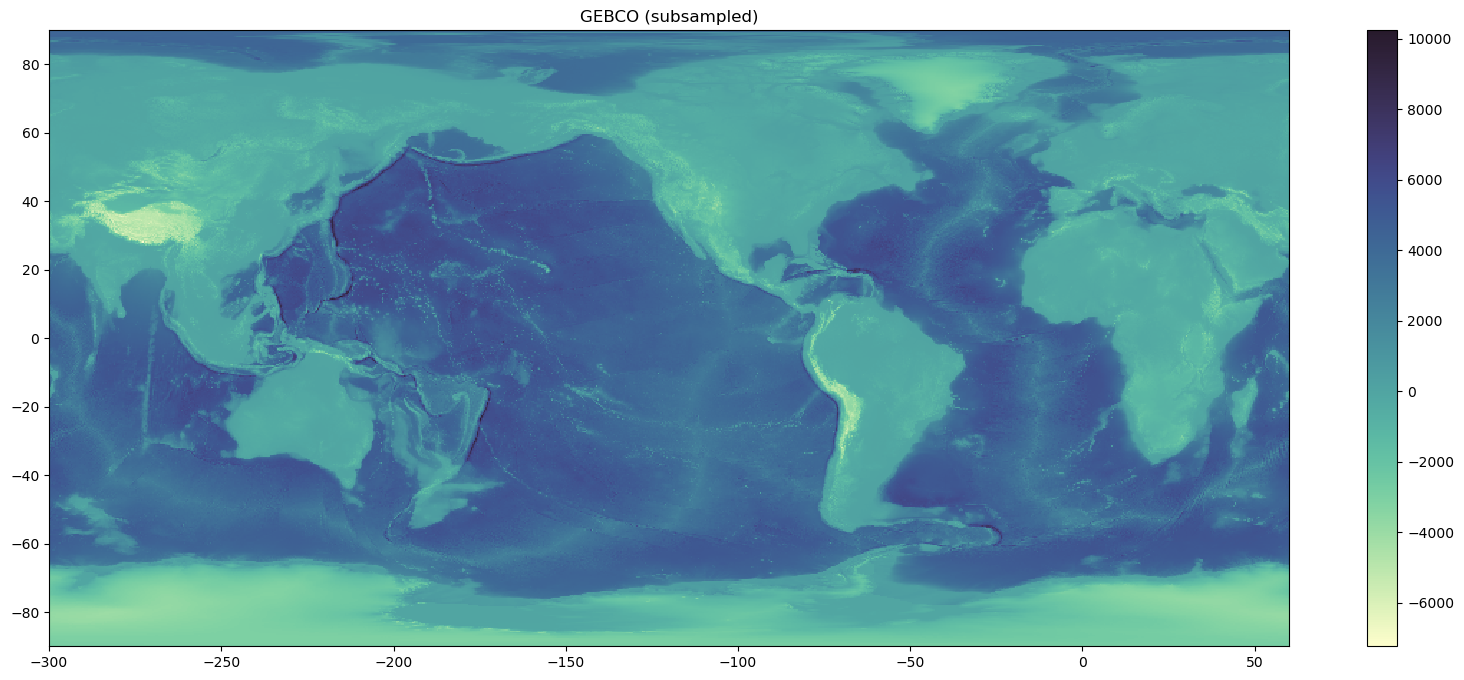

In [4]:
# GEBCO-2020 + Bedmachine combined topography 

fname_gebco  = "/archive/gold/datasets/topography/GEBCO_2023/GEBCO_2023.nc"

GEBCO = GEBCO_data(fname_gebco)

plt.figure(figsize=(20,8))
plt.pcolormesh(GEBCO.lonq[::100], GEBCO.latq[::100], GEBCO.depth[::100,::100], cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('GEBCO (subsampled)');

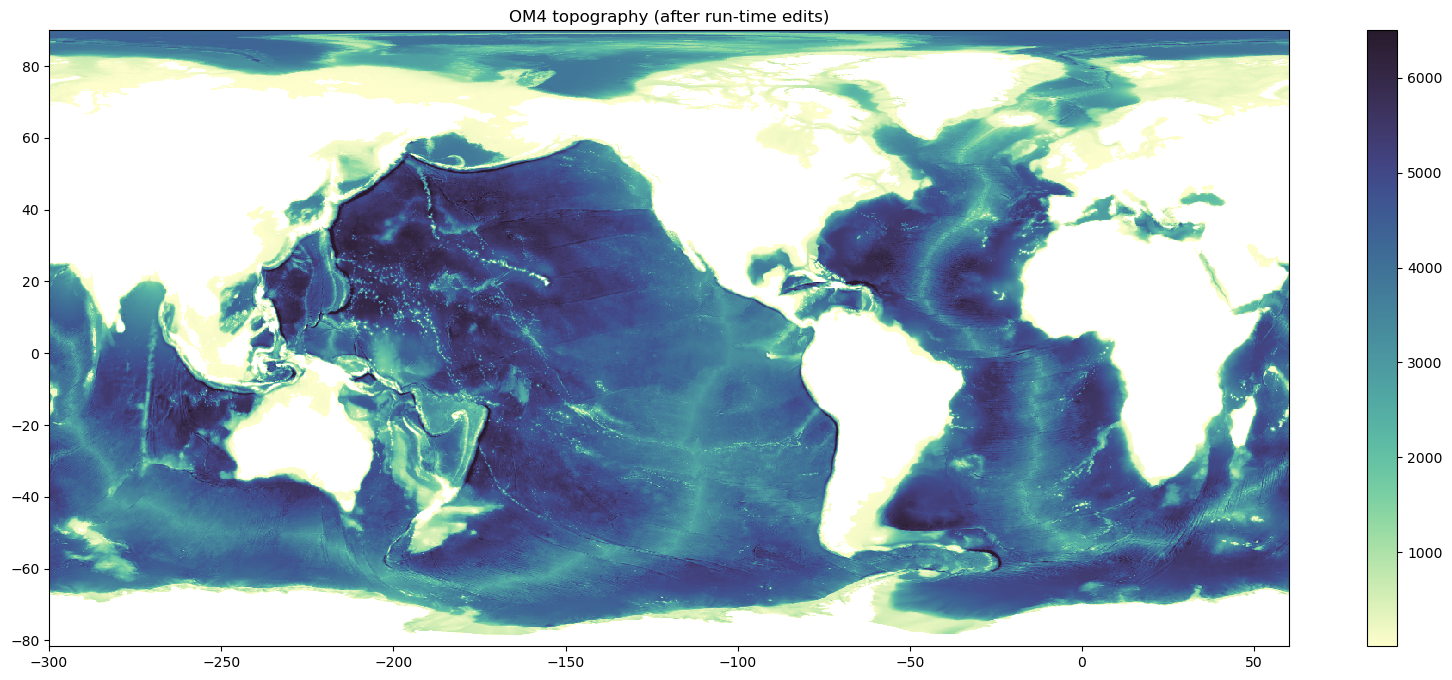

In [5]:
OM4 = OM4_data('/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_hgrid.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_static.nc',
               '/archive/gold/datasets/OM4_025/mosaic.v20170622.unpacked/ocean_mask.nc')
plt.figure(figsize=(20,8))
plt.pcolormesh(OM4.lonq, OM4.latq, OM4.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM4 topography (after run-time edits)');

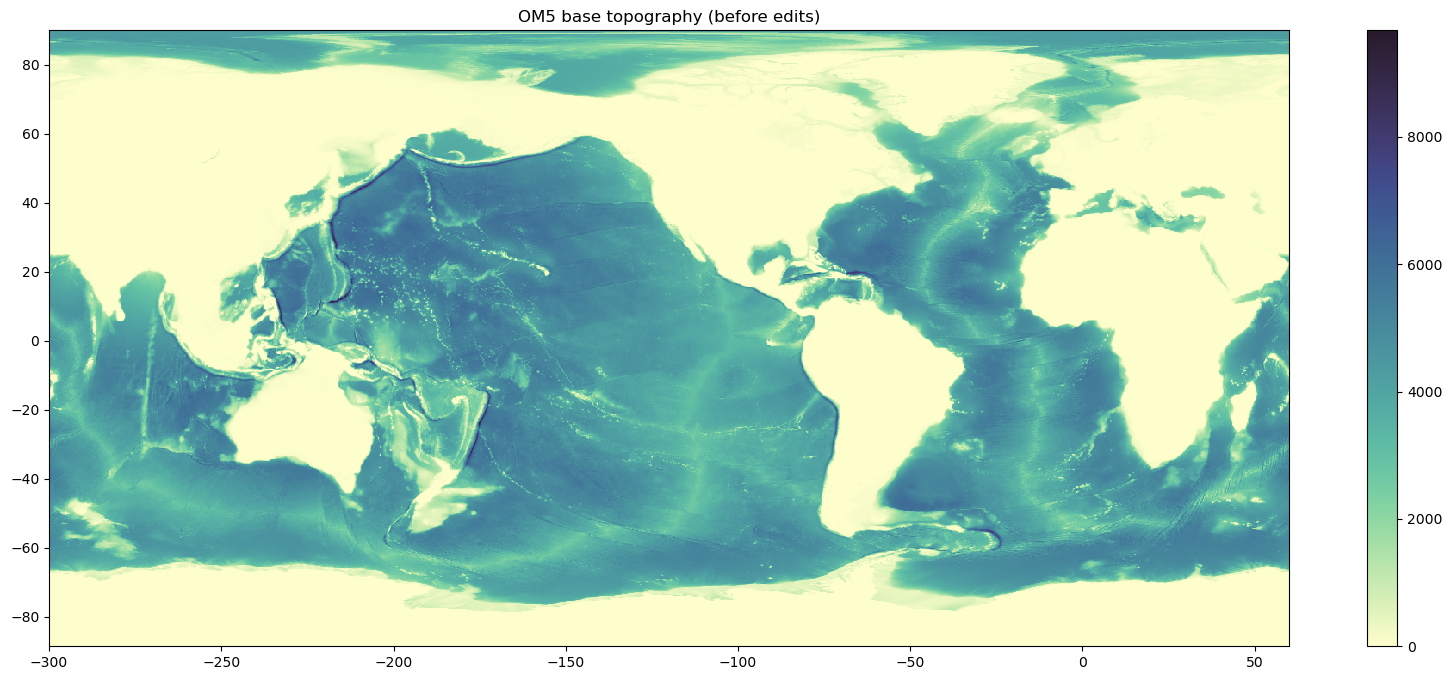

In [6]:
OM5 = OM5_data('ocean_hgrid.nc',
               'regridded_source_topog.nc')

plt.figure(figsize=(20,8))
plt.pcolormesh(OM5.lonq, OM5.latq, OM5.depth, cmap=cmocean.cm.deep)
plt.colorbar(); plt.title('OM5 base topography (before edits)');

In [7]:
# ---------------------------------------------------------------------- 
# -------------------Barents and Norwegion Sea----------------------- 
# ---------------------------------------------------------------------- 

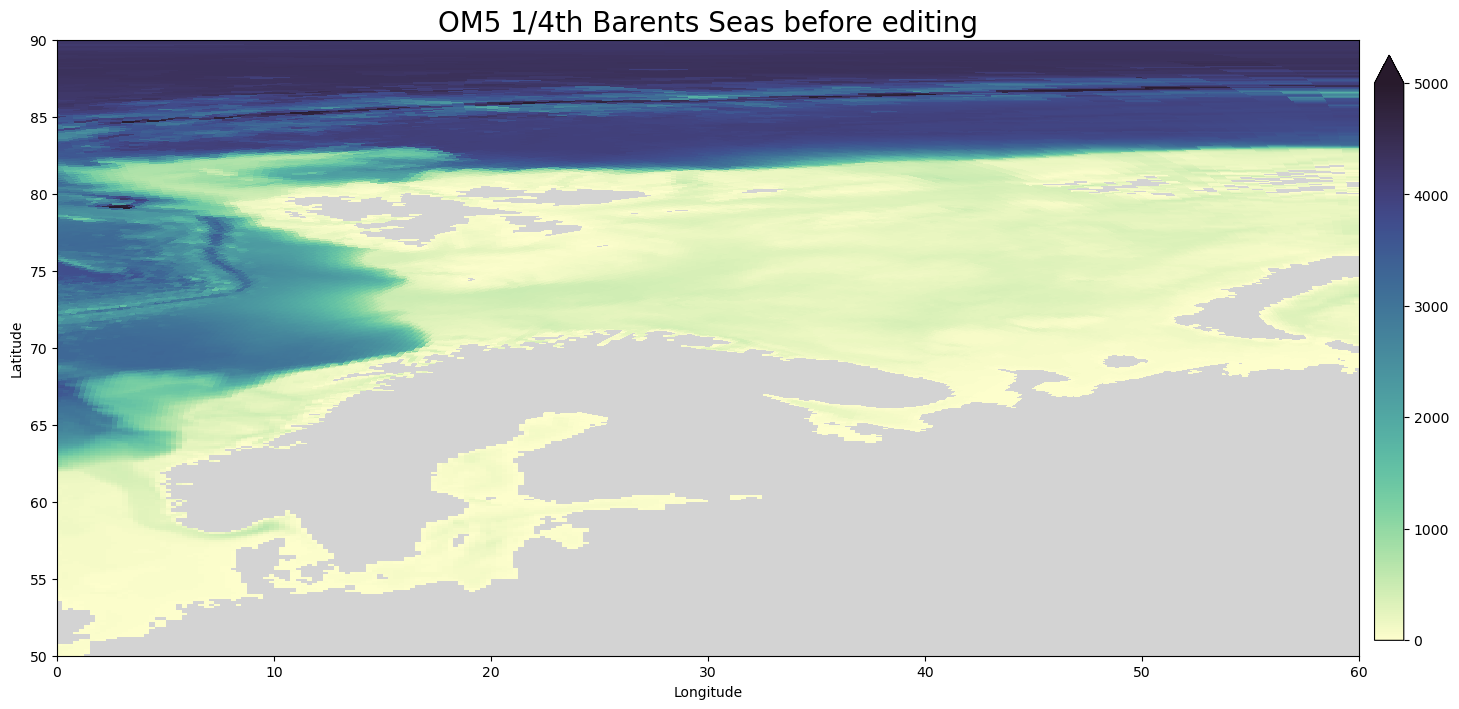

In [8]:
# Broad view before edits 

broadview(OM4,OM5,(0,60), (50,90), 0, 5000, "Barents Seas", om4=False, new=False)

Gebco (js:je,is:ie) = 33839:34319,72959:73439
OM4 model (js:je,is:ie) = 740:755,1214:1224
OM5 model (js:je,is:ie) = 821:836,1214:1224
Using xlim = (4.0, 6.0) ylim = (51.0, 53.0)


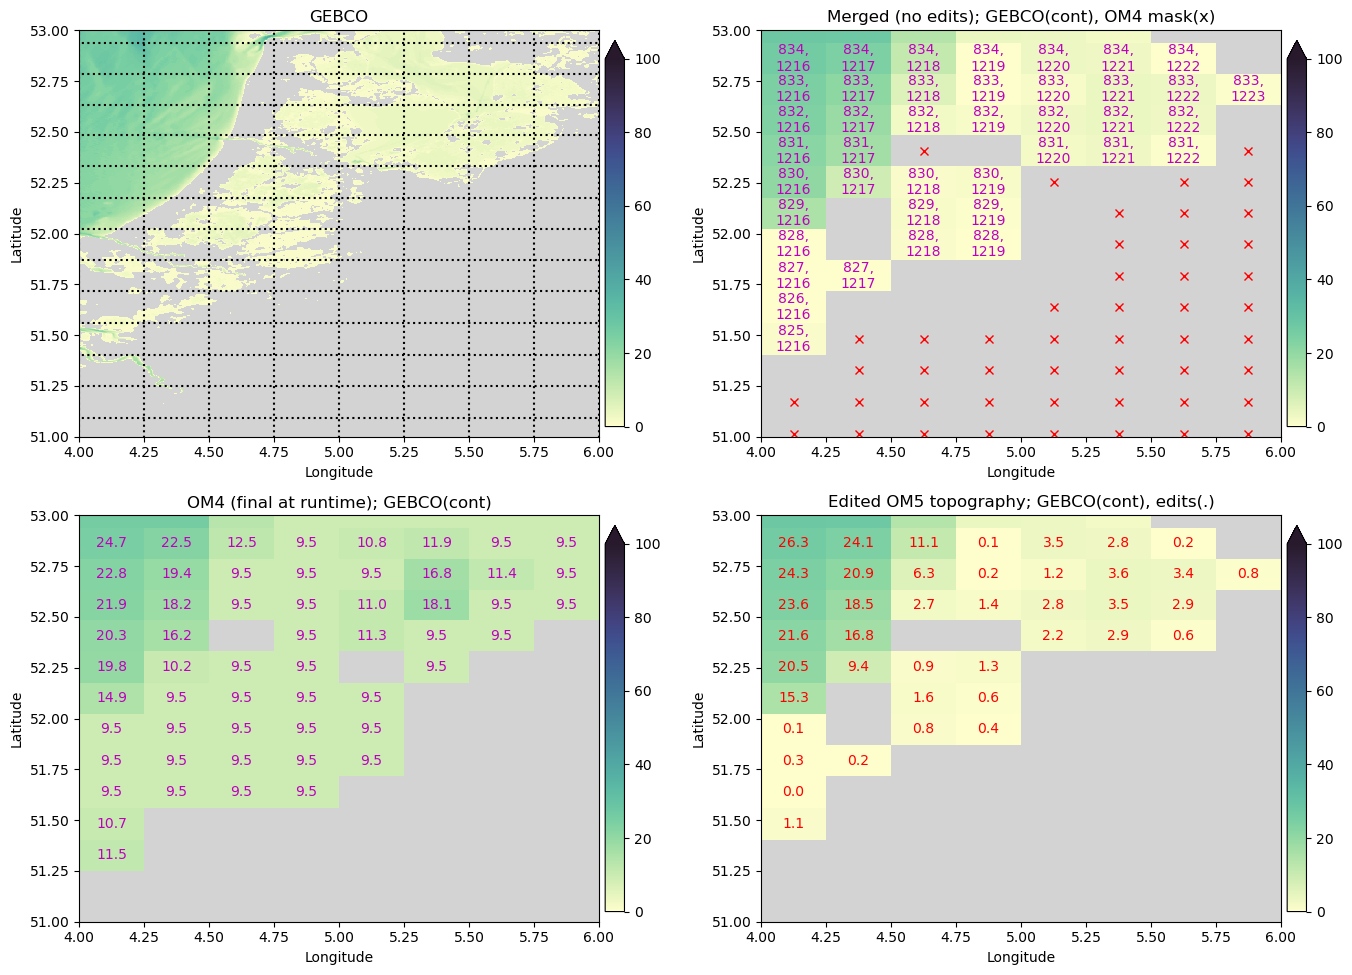

In [9]:
region = Region(5, 52, width_lon=2, width_lat=2)
#OM5.reset(region)

#Note: decided to leave Amsterdam "as is"

map_region(region, 0, 100, GEBCO, OM4, OM5, '', gebco_contours=[0] )#, sill_check=[(-6.2,35.8,-4.8,36.1)])

Gebco (js:je,is:ie) = 35399:35879,77399:77879
OM4 model (js:je,is:ie) = 785:802,1288:1298
OM5 model (js:je,is:ie) = 866:883,1288:1298
Using xlim = (22.5, 24.5) ylim = (57.5, 59.5)


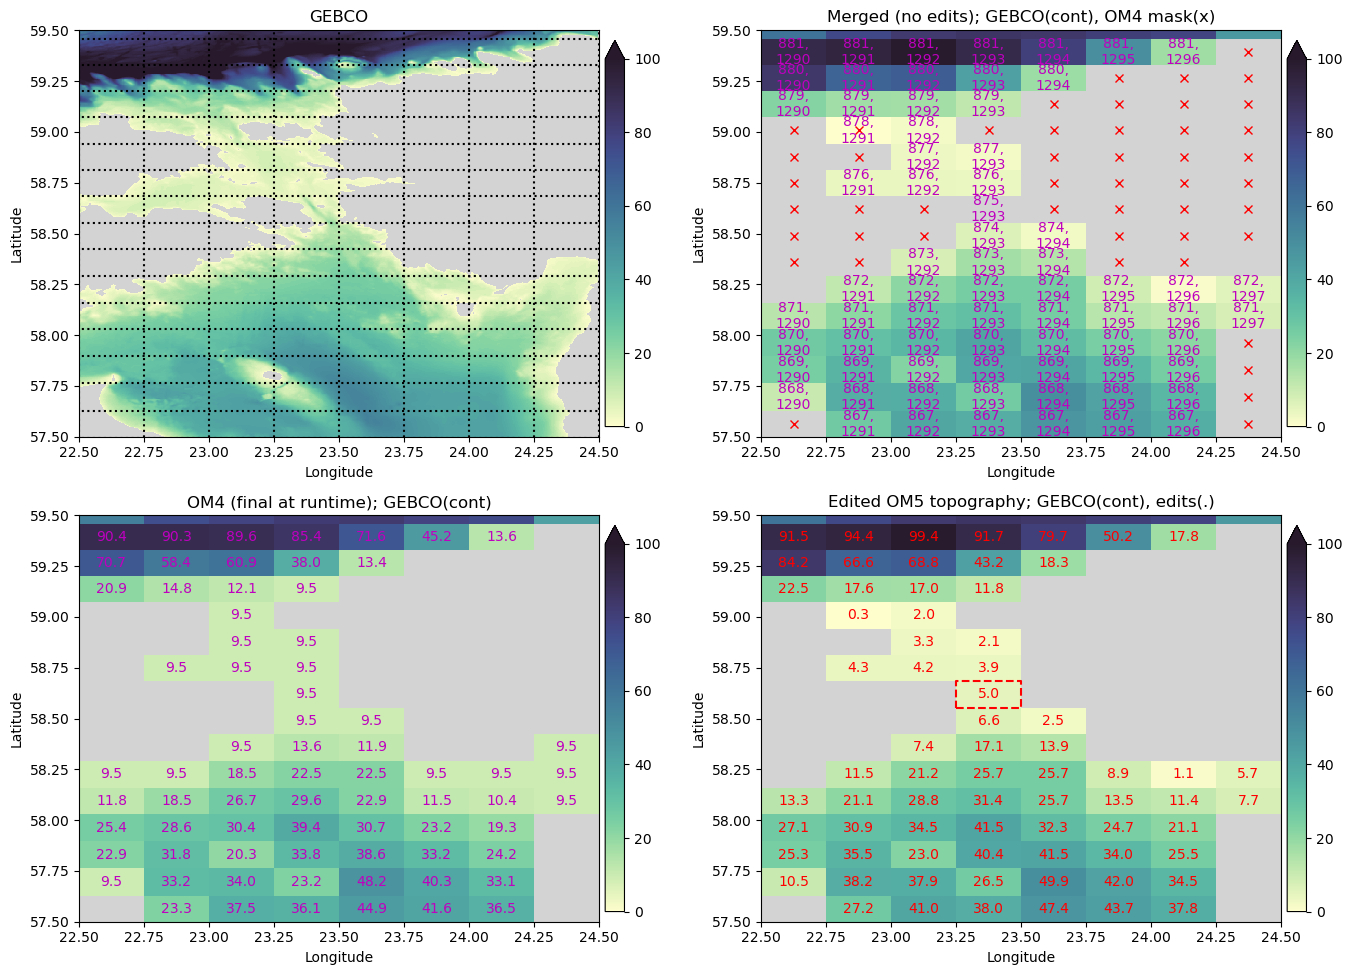

In [10]:
region = Region(23.5, 58.5, width_lon=2, width_lat=2)
#OM5.reset(region)
OM5.depth[875,1293] = 5.0

map_region(region, 0, 100, GEBCO, OM4, OM5, '', gebco_contours=[0] )#, sill_check=[(-6.2,35.8,-4.8,36.1)])

In [11]:
OM5.write_nc("om5_topo_edits_region_24.nc")

New Depth at jEdit=875 iEdit=1293 set to 5.0
NetCDF file 'om5_topo_edits_region_24.nc' written successfully.
